In [1]:
import pandas as pd
import os

models = ["LXMERT", "CLIP", "FLAVA", "SigLip"]

#put all models' VALSE output data into a single dataframe
dfs = [pd.read_pickle(f"../xai_maps/xai_output/{model_name}_all_of_valse_output_scores.pickle") for model_name in models]
for model_name, model_df in zip(models, dfs):
    model_df['model']=model_name
df = pd.concat(dfs)

df['filename'] = [os.path.basename(path) for path in df['img_path']]

df.head(1)

,img_path,caption,foil,linguistic_phenomena,model_pred_caption,model_pred_foil,model_pred_diff,model,filename
0,../../VALSE_data/images/coco2017/000000462576.jpg,Breakfast items including juice are on the table.,Breakfast items including juice are off the ta...,relations,0.056552,0.087249,-0.030697,LXMERT,000000462576.jpg


In [2]:
df.columns

Index(['img_path', 'caption', 'foil', 'linguistic_phenomena',
       'model_pred_caption', 'model_pred_foil', 'model_pred_diff', 'model',
       'filename'],
      dtype='object')

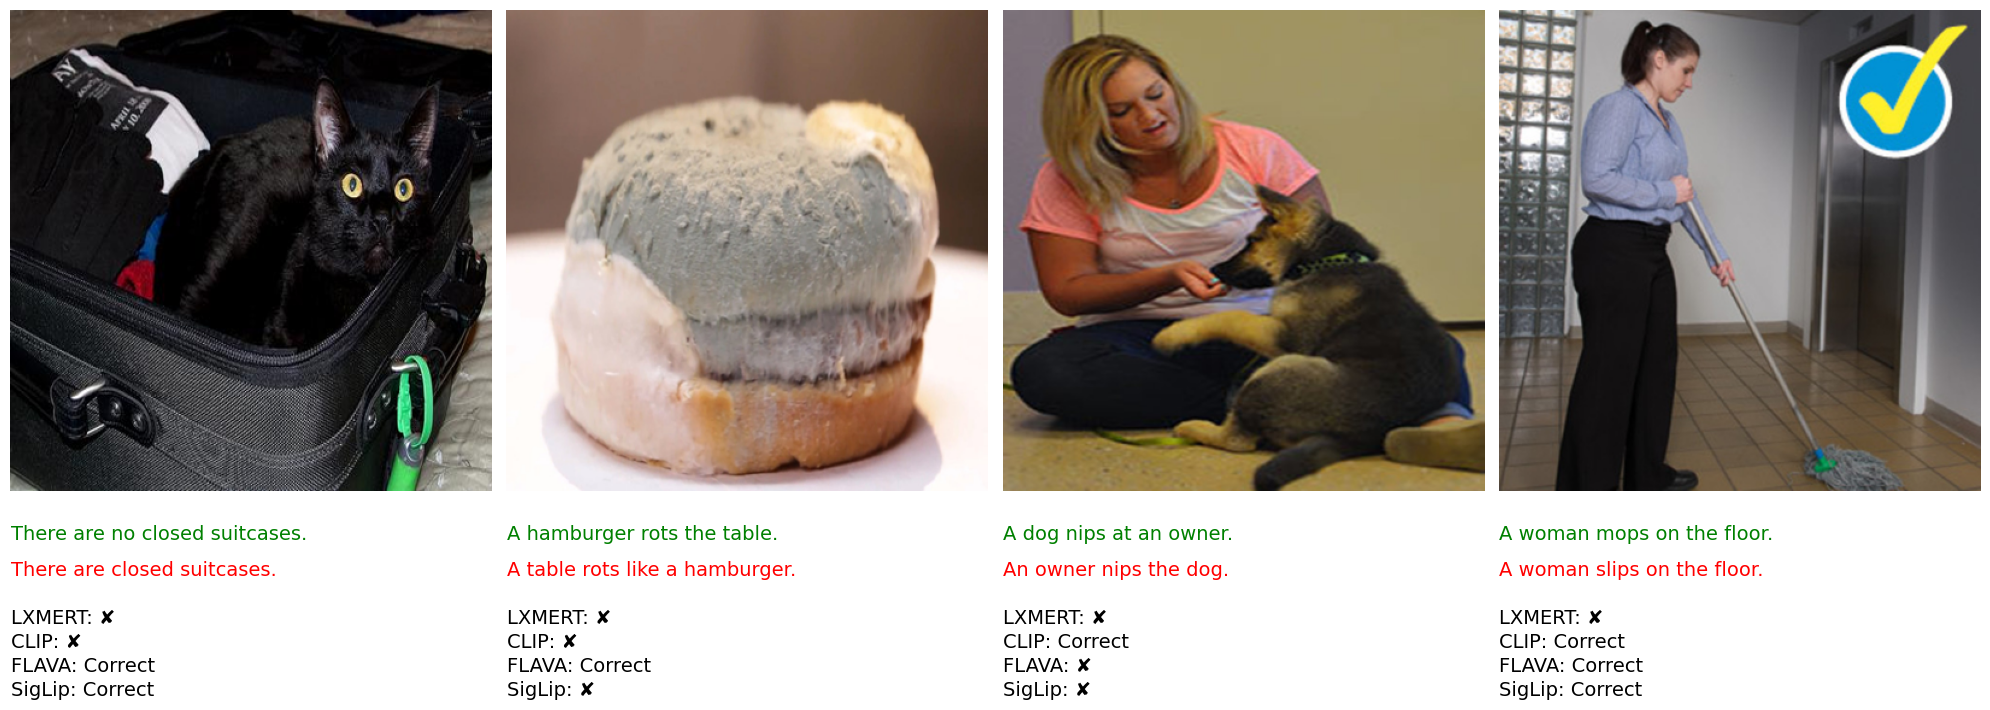

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# sample 4 filenames
sampled_filenames = df['filename'].drop_duplicates().sample(4)


fig, axs = plt.subplots(1, len(sampled_filenames), figsize=(len(sampled_filenames) * 5, 10))

# set the model names
model_names = ['LXMERT', 'CLIP', 'FLAVA', 'SigLip']

for i, filename in enumerate(sampled_filenames):
    # filter the dataframe to the current filename
    data = df[df['filename'] == filename].reset_index()
    
    # display image
    img = Image.open(data.loc[0, 'img_path']).resize((400, 400))
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis
    
    # print caption and foil
    caption = data.loc[0, 'caption']
    foil = data.loc[0, 'foil']
    axs[i].text(0, 440, caption, fontsize=14, color='green', wrap=True)
    axs[i].text(0, 470, foil, fontsize=14, color='red', wrap=True)
    
    # under image, print model correctness per model
    text_position = 510  # starting y position of text
    for model in model_names:
        model_data = data[data['model'] == model]
        if not model_data.empty:
            correct = 'Correct' if model_data['model_pred_diff'].iloc[0] >= 0 else '✘'
        else:
            correct = '-'
        axs[i].text(0, text_position, f'{model}: {correct}', fontsize=14, color='black')
        text_position += 20  # move to the next line for  next model

plt.tight_layout()
plt.show()